## ch04-06 히스토그램

히스토그램은 세로죽에 횟수(값의 출현 빈도), 가로축에 계급값을 취급하는 그래프로, 데이터의 분포 형상을 시각적으로 인식하기 위해 이용된다. 데이터의 분포 형상은 통계학적으로 중요한 의미를 가지고 있다. 

### 히스토그램 작성하기
히스토그램은 Axes.hist() 메서드를 사용해서 작성한다. 메서드에 넘기는 데이터에는 리스트형, 오브젝트를 이용할 수 있다. 다음 코드는 평균값 100, 표준편차 10의 정규분포에 따라 만 개의 데이터 히스토그램을 그린다. 

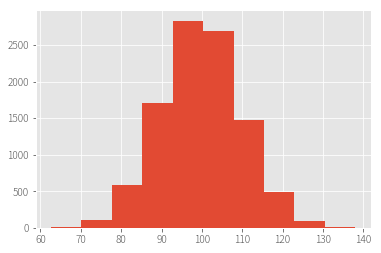

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 첫번째 그래프가 출력되지 않는 경우가 있다. (참고로 매직 명령어는 # 주석을 사용할 수 없다. )

plt.style.use('ggplot')

# 데이터 세트 작성
mu = 100 # 평균값
sigma = 10 # 표준편차

np.random.seed(0)
x = np.random.normal(mu, sigma, 10000)

# 히스토그램 그리기
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()


### 막대의 폭과 수를 변경하는 경우

hist() 메서드에는 뎅터 외에 히스토그램 그림에 관한 인수를 부여할 수 있다. 다음 코드에서는 rwidth로 막대의 폭을, 
bins로 막대의 개수를 지정하고 있다. 이와 같이 인수를 지정하면 막대의 폭이나 개수가 변경된 그래프가 출력된다. 막대의 폭에 의한 상세한 설정은 "계급폭 설정"을 참조한다. 

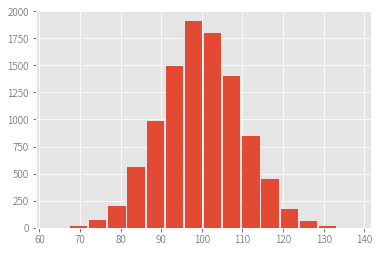

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins = 16)

plt.show()

### 히스토그램 활용하기

실제 데이터를 이용해서 그래프를 그린다. 데이터는 anime_master.csv 파일을 이용한다.

In [3]:
import pandas as pd

anime_master_csv = './anime/anime_master.csv'
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


평점 분페에 대해 Matplotlib으로 시각화를 실행한다. 다음 코드는 pandas의 Series 를 hist() 메서드의 인수에 넘겨서 그래프를 출력한다. 평점 0~10의 범위에서 실행되고 있기 때문에 값의 범위를0~10으로 지정한다. 결과 그래프에서 6~7사이의 데이터가 가장 많고, 0~3이나 9~10 사이의 데이터는 극단적으로 적은 것을 확인할 수 있다 

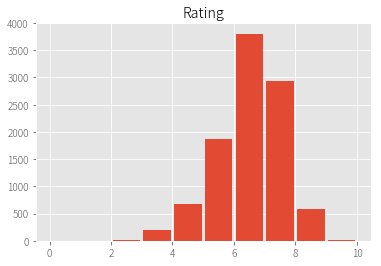

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0,10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

에피소드 수도 히스토그램을 이용해서 시각화 한다. 에피소드 수는 텔레비젼 애니메이션의 00화 라는 의미로, 영화의경우에는 기본적으로 값이 1이 된다. 여기에서는 에피소드 수의 불균형이 크다고 예상되는 TV에 한정해서 시각화 한다. 

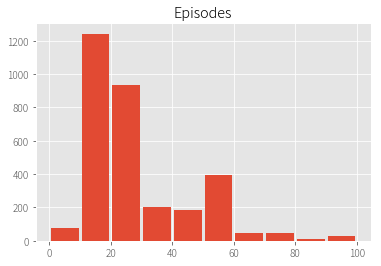

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_tv = df[df['type']=='TV']
# print(df.head())
# print(df_tv.head())

ax.hist(df_tv['episodes'], rwidth=0.9, bins=10, range=(0, 100))
ax.set_title('Episodes')

plt.show()

TV 애니메이션은 텔레비젼 방영 구조상, 1시즌(10~13화 정도) 또는 2시즌(23~25화 정도)의 작품이 많다 그것을 뒷받침하는 분포를 확인할 수있다.

### 다양한 히스토그램 작성하기

다양한 패턴의 히스토그램을 작성하는 방법을 설명한다. 

#### 수평 히스토그램

인수 orientation에 horizontal(초기설정은 vertical)을 지정하면 수평ㄹ 히스토그램을 그릴 수 있다. 

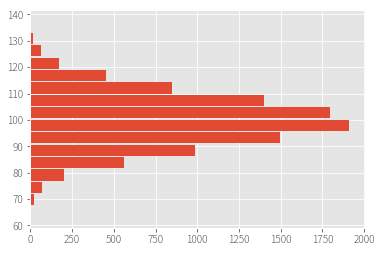

In [6]:
np.random.seed(0)

x =  np.random.normal(100, 10, 10000)
fig = plt.figure()
ax = fig.add_subplot(111)

# orientation을 horizontal에 지정
ax.hist(x, rwidth=0.9, bins = 16, orientation ='horizontal')

plt.show()

#### 상대도수 히스토그램

데이터 수가 다른 그룹의 히스토그램을 비교하는 경우에는 상대도수를 이용해서 히스토그램화하면 비교가 용이하다. 상대도수 히스토그램을 그래는 경우에는 인수 normed에 True를 지정한다. 상대도수 히스토그램에서 상대도수의 합계가 1이 된다. 

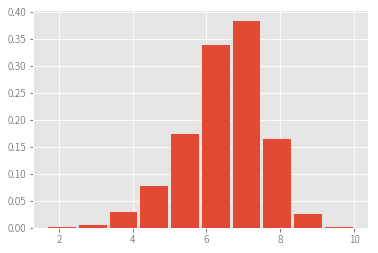

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

# normed 을 True 로 지정
# ax.hist(df['rating'], normed=True, rwidth=0.9)
ax.hist(df['rating'], density=True, rwidth=0.9)

plt.show()

#### 누적 히스토그램(누적도수 그림)

누적도수를 확인하는 경우에는 누적히스토그램을 이용한다. 누적 히스토그램을 그래는 경우 인수 cummulative에 True를 지정한다. 다음 코든느 상대도수의 누적 히스토그램을 그리고 있다. 상대도수를 누적하면 합계가 1이 되는 것을 확인할 수 있다.

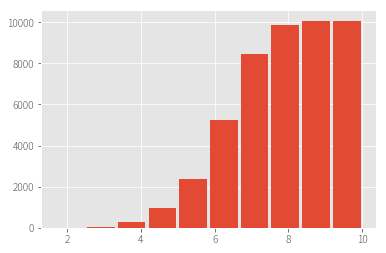

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

#cumulative 을 True로 지정
ax.hist(df['rating'], cumulative=True, rwidth=0.9)

plt.show()

#### 계급폭 지정

bins 옵션에 리스트형 수열을 부여하는 것에 따라 계급 폭을 지정할 수 있다. 계급폭은 같은 간격이 아니어도 상관 없다. 
다음 코드에서는 2, 1.5, 1, 0.5, 0.5, 1, 1.5 로 계급 폭을 변화시키고 있다.

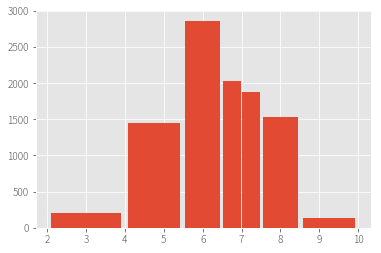

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth = 0.9)

plt.show()

#### 근사 곡선 추가

근사 곡선은 히스토그램을 그린 후에 꺽은선 그래프로 그린다. 여기에서는 정규분포를 이용해서 근사한다.

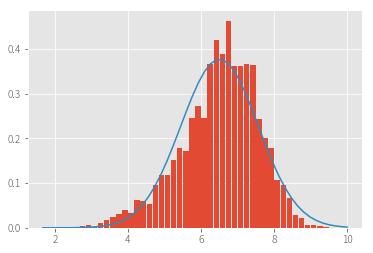

In [20]:
bins = 50 # 막대 수
dfmin = np.min(df['rating']) # 데이터 최솟값
dfmax = np.max(df['rating']) # 데이터 최댓값

# 히스토그램 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins = bins, range = (dfmin, dfmax), normed=True, rwidth = 0.9)

# 평균과 표준편차
mu, sigma = df['rating'].mean(), df['rating'].std()

# X값
x = np.linspace(dfmin, dfmax, bins) # 막대의 단락 값

#근사적 확률밀도함수를 사용해 Y값 생성
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 근사곡선 그리기
ax.plot(x, y)

plt.show()


#### 근사 곡선은 다음 단계로 그린다
- 1) df['rating'] 데이터 세트의 평균값과 표준편차를 구한다. 
- 2) numpy.linspace로 각 막대 단락 값(막대의 상한값과 하한값) 구하기
- 3) 구해진 평균값, 표준편차, 단락값으로부터 정규분포곡선의 확률밀도함수에 따라 Y값 산출하기
- 4) 구해진 X값과 Y값으로 근사 곡선 그리기

#### 여러 그룹을 겹쳐서 그리기

같은 서브플롯에 히스토그램을 반복해서 그리면 여러 그룹의 히스토그램을 겹쳐서 그리는 것이 가능하다

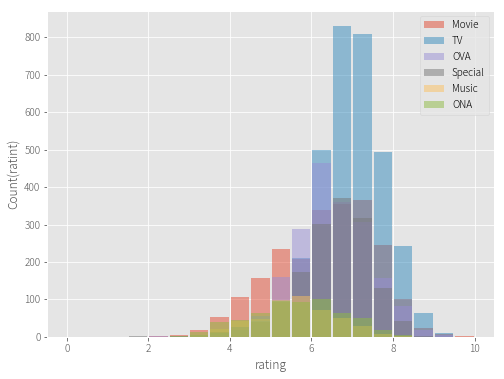

In [31]:
types = df['type'].unique()
labels = types.tolist()

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type']==t, 'rating'], 
           bins = b_num, 
           rwidth=0.9,
           alpha = 0.5,
           label=t)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(ratint)')

plt.show()

### 여러 그룹을 나열하여 그리기(page 201)

여러 그룹의 히스토그램을 겹쳐서 그려서 시인성이 떨어지는 경우에는 그룹을 나열하는 방법이 있다. 중첩리스트를 작성한 후 그리면 여러 구룹을 옆으로 나열한 히스토그램을 그릴 수 있다. 

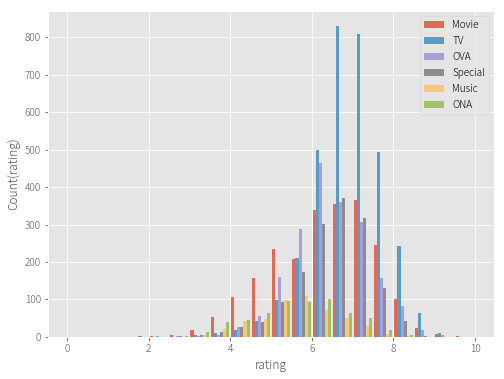

In [35]:
# 데이터 셋트 작성

dataset = [df.loc[df['type']==t, 'rating'] for t in types]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(dataset, 
       bins = np.arange(0, 10.5, 0.5),
       rwidth = 0.9,
       alpha = 0.8,
       label = labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()
